In [1]:
import numpy as np
import matplotlib.pyplot as plt
import utils

In [2]:
def do_everything(image1_path, image2_path, points_path, output_path, scale_factor):
    img1 = plt.imread(image1_path)
    img2 = plt.imread(image2_path)

    if img1 is None or img2 is None:
        print("Error: One of the images could not be loaded.")
        exit()

    img1 = img1.astype(np.float32) / 255.0 if img1.max() > 1 else img1.astype(np.float32)
    img2 = img2.astype(np.float32) / 255.0 if img2.max() > 1 else img2.astype(np.float32)

    points_img1, points_img2 = utils.load_points(img1, img2, points_path)

    img1, points_img1 = utils.recale(img1, points_img1, scale_factor)
    img2, points_img2 = utils.recale(img2, points_img2, scale_factor)

    points_img1 = np.array(points_img1)
    points_img2 = np.array(points_img2)

    H = utils.computeH(points_img1, points_img2)

    img1_warped, alpha, translate = utils.warpImage(img1, H)

    combined_images = utils.combine_images(img1_warped, img2, alpha, translate)

    plt.imshow(combined_images)
    plt.axis('off')
    plt.show()

    plt.imsave(output_path, combined_images)


In [3]:
def rectify(image_path, points_path, output_path, scale_factor):
    img = plt.imread(image_path)

    if img is None:
        print("Error: The image could not be loaded.")
        exit()

    img = img.astype(np.float32) / 255.0 if img.max() > 1 else img.astype(np.float32)

    points1, points2  = utils.load_points(img, img, points_path)

    img, points1 = utils.recale(img, points1, scale_factor)
    _, points2 = utils.recale(img, points2, scale_factor)

    points1 = np.array(points1)
    points2 = np.array(points2)

    H = utils.computeH(points1, points2)

    img_warped, _, _ = utils.warpImage(img, H, True)

    plt.imshow(img_warped)
    plt.axis('off')
    plt.show()

    plt.imsave(output_path, img_warped)

Loaded points from file:
Points from Image 1: [[335.21624039226083, 335.9271799628942], [429.18313510469125, 311.6883696660482], [420.88217267426455, 468.0785018552875], [327.5793549562683, 479.0357722634508]]
Points from Image 2: [[3.753826530612514, 3.9464285714284415], [678.1288265306123, 5.428571428571331], [679.6109693877552, 903.6071428571428], [5.235969387755404, 903.6071428571428]]
Output image dimensions: width=685, height=913
Translation offsets: translate_x=0, translate_y=0
Starting forward mapping of pixels...
Number of points to interpolate: 14328
Interpolating pixel values...


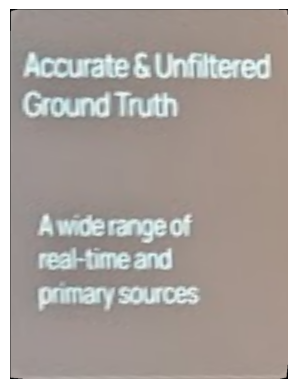

In [4]:
rectify("x.jpg", "selected_points_x.json", "x_rectified.jpg", 1)

Loaded points from file:
Points from Image 1: [[724.14060603538, 598.2136998959421], [659.6891244239633, 2426.8782991202347], [1936.6573355676583, 1308.4557771261], [1957.4487557603688, 2161.0202346041056]]
Points from Image 2: [[130, 160], [130, 2950], [3880, 160], [3880, 2950]]
Output image dimensions: width=408, height=307
Translation offsets: translate_x=0, translate_y=0
Starting forward mapping of pixels...
Number of points to interpolate: 20854
Interpolating pixel values...


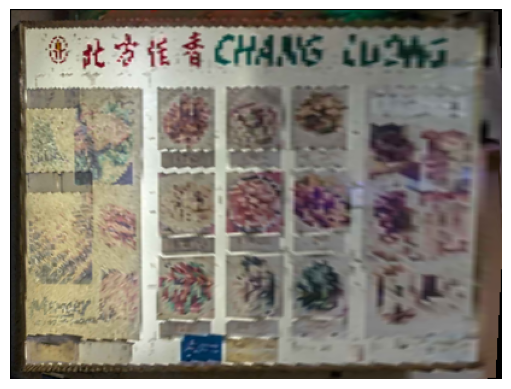

In [5]:
rectify("chinese_food.jpg", "chinese_points.json", "chinese_rectified.jpg", 1)

Loaded points from file:
Points from Image 1: [[406.0790875904789, 310.8042968251943], [479.9950542906278, 358.9060995823523], [707.1749226212505, 596.9482418686227], [447.0841783502989, 524.8842970117827], [720.0007884058773, 848.8270815231226]]
Points from Image 2: [[94.3197922557726, 284.6730059117497], [172.16195693267878, 347.01413346684774], [370.2657549597256, 594.896817831118], [122.1597489672101, 515.707065334009], [364.0014980459443, 826.0251507963944]]
Output image dimensions: width=1065, height=1415
Translation offsets: translate_x=615.177303960406, translate_y=243.1407908085054
Starting forward mapping of pixels...
Number of points to interpolate: 762048
Interpolating pixel values...


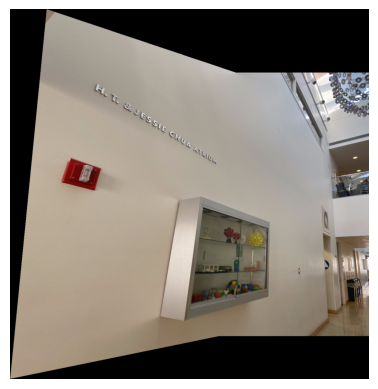

In [6]:
do_everything("soda-1.jpg", "soda-2.jpg", "selected_points.json", "soda.jpg", 1)

Loaded points from file:
Points from Image 1: [[586.4530505723205, 305.06422393340284], [622.401204578564, 365.5417065556713], [728.1310693028096, 352.00828387096783], [603.7833012149142, 129.2224633431087], [656.886996229577, 126.65706744868055], [630.9764976958527, 119.21741935483891], [833.8981912174818, 316.18121573361094], [976.9295522164412, 304.88926618106154], [848.3267934235171, 217.69032241415204], [1036.5259526326743, 316.8085462643081]]
Points from Image 2: [[221.26047950052026, 375.7584840790844], [255.1645227887617, 439.44310593132167], [371.0796978147763, 426.6145490114465], [254.68902387934642, 196.4421700879767], [311.07072475911184, 202.43442815249284], [284.3779388353581, 190.7222873900295], [470.193893860562, 403.76305265348617], [594.5322147762749, 402.49429427679524], [489.22526951092624, 313.04682872008345], [641.47627471384, 414.5474988553592]]
Output image dimensions: width=1469, height=1035
Translation offsets: translate_x=784.2470785326279, translate_y=111.92

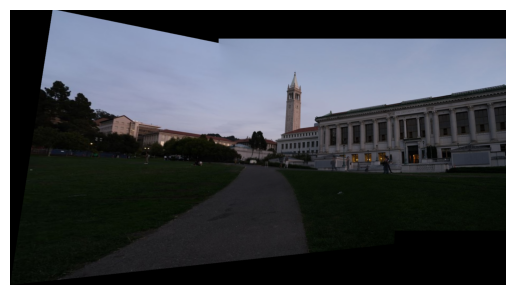

In [7]:
do_everything("glade-1.jpg", "glade-2.jpg", "glade_points.json", "glade.jpg", 1)

Loaded points from file:
Points from Image 1: [[502.519145723205, 286.18061835587946], [591.1278210197711, 423.1644828303851], [518.7957549219562, 559.5872238085327], [261.8067318210198, 456.22470110301776], [688.0511432258065, 413.7739086784601], [134.57493694068677, 282.7333212903227]]
Points from Image 2: [[809.5228182310093, 151.68316786680546], [914.2709056399581, 291.7973915504684], [843.1061475962542, 435.63632732570255], [578.3409446826222, 342.28214326742983], [1033.1153013943808, 274.529942476587], [456.399670842872, 186.03681481789815]]
Output image dimensions: width=1613, height=968
Translation offsets: translate_x=-326.01808416423677, translate_y=331.3319294782043
Starting forward mapping of pixels...
Number of points to interpolate: 777600
Interpolating pixel values...


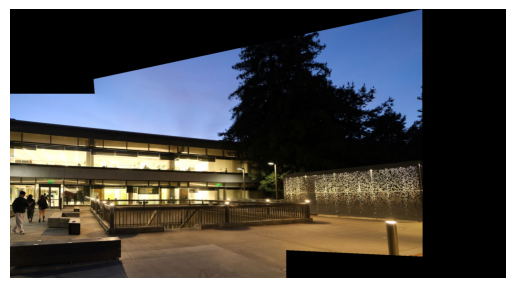

In [8]:
do_everything("moffit-1.jpg", "moffit-2.jpg", "moffit_points.json", "moffit.jpg", 1)

Loaded points from file:
Points from Image 1: [[564.95086867846, 82.3354530697192], [973.5794637620445, 44.672082111437135], [575.5306520707596, 417.8905764828305], [968.7599062643083, 409.9427115088449], [761.6590163579606, 256.1493089698232], [765.520673798127, 455.45413177939656]]
Points from Image 2: [[90.38452861602491, 9.325265348595252], [511.62925848345196, 72.54621700879787], [86.82092869927158, 393.10598576482835], [489.64164378772114, 400.1760411238294], [308.92715204994795, 237.21585931321556], [302.53301261186266, 439.37891279916767]]
Output image dimensions: width=1721, height=1316
Translation offsets: translate_x=1126.6819340424086, translate_y=420.15930219792716
Starting forward mapping of pixels...
Number of points to interpolate: 777600
Interpolating pixel values...


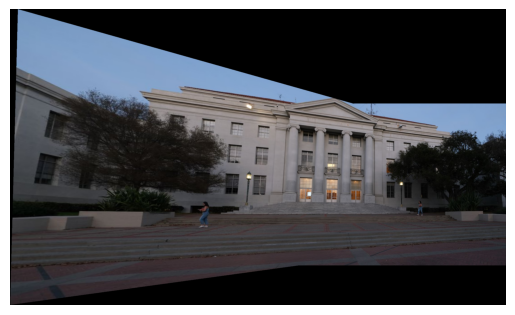

In [9]:
do_everything("sproul-1.jpg", "sproul-2.jpg", "sproul_points.json", "sproul.jpg", 1)